In [1]:
# Importing Necessary Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
df = pd.read_csv("salary.csv")
pd.set_option("display.max_columns", None)
df

C:\Users\sweet\AppData\Local\Temp\ipykernel_17324\1876715030.py:2: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("salary.csv")


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [3]:
# There is a warning while loading the dataset this is due to the dataset contains mixed data types to overcome this
# Loading the dataset with Low_memory set to False
df = pd.read_csv("salary.csv", low_memory= False)
df.head(2)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True


# 1) Basic Checks and some data filtering

In [5]:
# Let's rename the columns first for our convenience
# Define a dictionary with current column names (all caps) as keys and new names as values
new_column_names = {
    'AGENCY': 'agency',
    'AGENCY NAME': 'agency_name',
    'LAST NAME': 'last_name',
    'FIRST NAME': 'first_name',
    'MI': 'middle_initial',
    'CLASS TITLE': 'class_title',
    'CLASS CODE': 'class_code',
    'ETHNICITY': 'ethnicity',
    'GENDER': 'gender',
    'STATUS': 'status',
    'EMPLOY DATE': 'employ_date',
    'HRLY RATE': 'hourly_rate',
    'HRS PER WK': 'hours_per_week',
    'MONTHLY': 'monthly_income',
    'ANNUAL': 'annual_income',
    'summed_anual_salary': 'summed_annual_income',
    'STATE NUMBER': 'state_number',
    'duplicated': 'is_duplicated',
    'combined_multiple_jobs': 'combined_multiple_jobs',
    'multiple_full_time_jobs': 'multiple_full_time_jobs',
    'hide_from_search': 'hide_from_search'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Display the new column names to verify
print(df.columns)

Index(['agency', 'agency_name', 'last_name', 'first_name', 'middle_initial',
       'class_code', 'class_title', 'ethnicity', 'gender', 'status',
       'employ_date', 'hourly_rate', 'hours_per_week', 'monthly_income',
       'annual_income', 'state_number', 'is_duplicated',
       'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')


In [6]:
df.tail(2)

,agency,agency_name,last_name,first_name,middle_initial,class_code,class_title,ethnicity,gender,status,employ_date,hourly_rate,hours_per_week,monthly_income,annual_income,state_number,is_duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(149481, 21)

#### There are 149481 rows and 21 columns in the data.

In [9]:
# Checking for True duplicates
df.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
149476    False
149477    False
149478    False
149479    False
149480    False
Length: 149481, dtype: bool>

#### There are no actual Duplicates(True Duplicates) in the data

#### In the dataset, the column is_duplicated has values like "True" or "NoN". values marked as "True" indicate that the row is considered duplicated based on at least one column. This means that these rows are not true duplicates with identical entries in every column.

In [12]:
# Displaying the unique values in the "is_duplicated" column.
print(df['is_duplicated'].unique())
# Displaying count of values other then NaN
print(df['is_duplicated'].value_counts())

[True nan]
is_duplicated
True    143
Name: count, dtype: int64


#### So there are only two types of values present in the column 'is_duplicated'

#### So there are 143 rows where the data is duplicates based on at least one column.

In [15]:
# Displaying unique values in the "multiple_full_time_jobs" column.
print(df['multiple_full_time_jobs'].unique())
# Displaying count of values other than NaN
print(df['multiple_full_time_jobs'].value_counts())

[nan  1.]
multiple_full_time_jobs
1.0    14
Name: count, dtype: int64


#### There are two types of values in the 'multiple_full_time_jobs' column i.e 'NaN' and '1' and the '1' value is also very less that is only 14 times.

In [17]:
# Displaying unique values in the "combined_multiple_jobs" column.
print(df['combined_multiple_jobs'].unique())
# Displaying count of values other than NaN
print(df['combined_multiple_jobs'].value_counts())

[nan True]
combined_multiple_jobs
True    97
Name: count, dtype: int64


#### There are two type of values in the "combined_multiple_jobs" column 'True' and 'NaN' with count of 'True' values is only 97.

In [19]:
# Displaying unique values in the "summed_anual_salary" column.
print(df['summed_annual_salary'].unique())
# Displaying count of values other than NaN
print(df['summed_annual_salary'].value_counts())

[131407.08       nan 171383.4   31950.    33300.    33966.    39174.
  35570.52  56952.6   21839.76 121200.    90000.   150000.    92400.
  18000.    30312.84]
summed_annual_salary
131407.08    2
171383.40    1
31950.00     1
33300.00     1
33966.00     1
39174.00     1
35570.52     1
56952.60     1
21839.76     1
121200.00    1
90000.00     1
150000.00    1
92400.00     1
18000.00     1
30312.84     1
Name: count, dtype: int64


#### There are 16 unique values in the 'summed_annual_salary' column and each value is repeated only once and the value '131407.08' is repeated two times and all other values are 'NaN'.

In [21]:
# Displaying unique values in the "hide_from_search" column.
print(df['hide_from_search'].unique())
# Displaying count of values other than NaN
print(df['hide_from_search'].value_counts())

[nan True]
hide_from_search
True    16
Name: count, dtype: int64


#### There are only two types of values present in the 'hide_from_search_column' which are 'True' and 'NaN' and the 'True' value is repeated only 16 times.

### Overall onclusion based on the above four columns :
#### The columns 'is_duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search' not contribute not much in the dataset because there are most of the values are 'NaN'.
#### So we remove these columns from the dataset.

In [24]:
# List of columns to remove
columns_to_remove = ['is_duplicated',  'multiple_full_time_jobs', 'combined_multiple_jobs', 
                     'summed_annual_salary', 'hide_from_search']

# Removing the specified columns
data_cleaned = df.drop(columns=columns_to_remove)
data_cleaned.head(2)

,agency,agency_name,last_name,first_name,middle_initial,class_code,class_title,ethnicity,gender,status,employ_date,hourly_rate,hours_per_week,monthly_income,annual_income,state_number
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717


In [25]:
data = data_cleaned

In [26]:
# Checking for null values
data.isnull().sum()

agency            0
agency_name       0
last_name         0
first_name        0
middle_initial    0
class_code        0
class_title       0
ethnicity         0
gender            0
status            0
employ_date       0
hourly_rate       0
hours_per_week    0
monthly_income    0
annual_income     0
state_number      0
dtype: int64

#### There are no null values present in the data

In [28]:
# Checking for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   agency          149481 non-null  int64  
 1   agency_name     149481 non-null  object 
 2   last_name       149481 non-null  object 
 3   first_name      149481 non-null  object 
 4   middle_initial  149481 non-null  object 
 5   class_code      149481 non-null  object 
 6   class_title     149481 non-null  object 
 7   ethnicity       149481 non-null  object 
 8   gender          149481 non-null  object 
 9   status          149481 non-null  object 
 10  employ_date     149481 non-null  object 
 11  hourly_rate     149481 non-null  float64
 12  hours_per_week  149481 non-null  float64
 13  monthly_income  149481 non-null  float64
 14  annual_income   149481 non-null  float64
 15  state_number    149481 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 18.2+ 

### Conclusion:
#### There are 10 columns with the 'object' data type and there are 6 columns are numeric in the data.

# 2) EDA

## i) Descriptive Statistics

In [32]:
data.describe()

,agency,hourly_rate,hours_per_week,monthly_income,annual_income,state_number
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06


In [33]:
data.mode().iloc[0]

agency                                                        529.0
agency_name       HEALTH AND HUMAN SERVICES COMMISSION          ...
last_name                            SMITH                         
first_name                           MICHAEL                       
middle_initial                                                     
class_code                                                 4504    
class_title       CORREC  OFFICER IV                            ...
ethnicity                                           WHITE          
gender                                              FEMALE         
status                     CRF - CLASSIFIED REGULAR FULL-TIME      
employ_date                                                09/01/17
hourly_rate                                                     0.0
hours_per_week                                                 40.0
monthly_income                                              3720.17
annual_income                                   

### Interpretation:
#### 1) The maximum Hourly Rate is around 118 dollar and the minimum is less than 1 dollar
#### 2) The maximum working Hours per week are 70_hrs and minimum is 1_hr.
#### 3) The maximum Monthly Income by an employee is 46125 dollar and minimum is 50 dollar.
#### 4) The maximum Annual Income by an employee is 553500 dollar and minimum is 600 dollar.
#### 5) On an average heighest number of the employees are working in the the 'HEALTH AND HUMAN SERVICES COMMISSION' agency.
#### 6) On an average highest number of employess are working for the post of 'CORREC  OFFICER IV'.
#### 7) On an average Most of the employees belongs to the 'White' ethnicity.
#### 8) On an average there are more Female employees are working than the Male employees.
#### 9) On an average most of the employees have an employment satus 'CRF - CLASSIFIED REGULAR FULL-TIME'.
#### 10) On an average most of the employees have the hourly rate as less than 1 dollar, hours per week 40_hrs, monthly income around 3720 $ and annual income around 44642 dollar.

## ii) Univariate Analysis

In [56]:
data['agency'].nunique()

113

In [58]:
data['class_title'].nunique()

1422

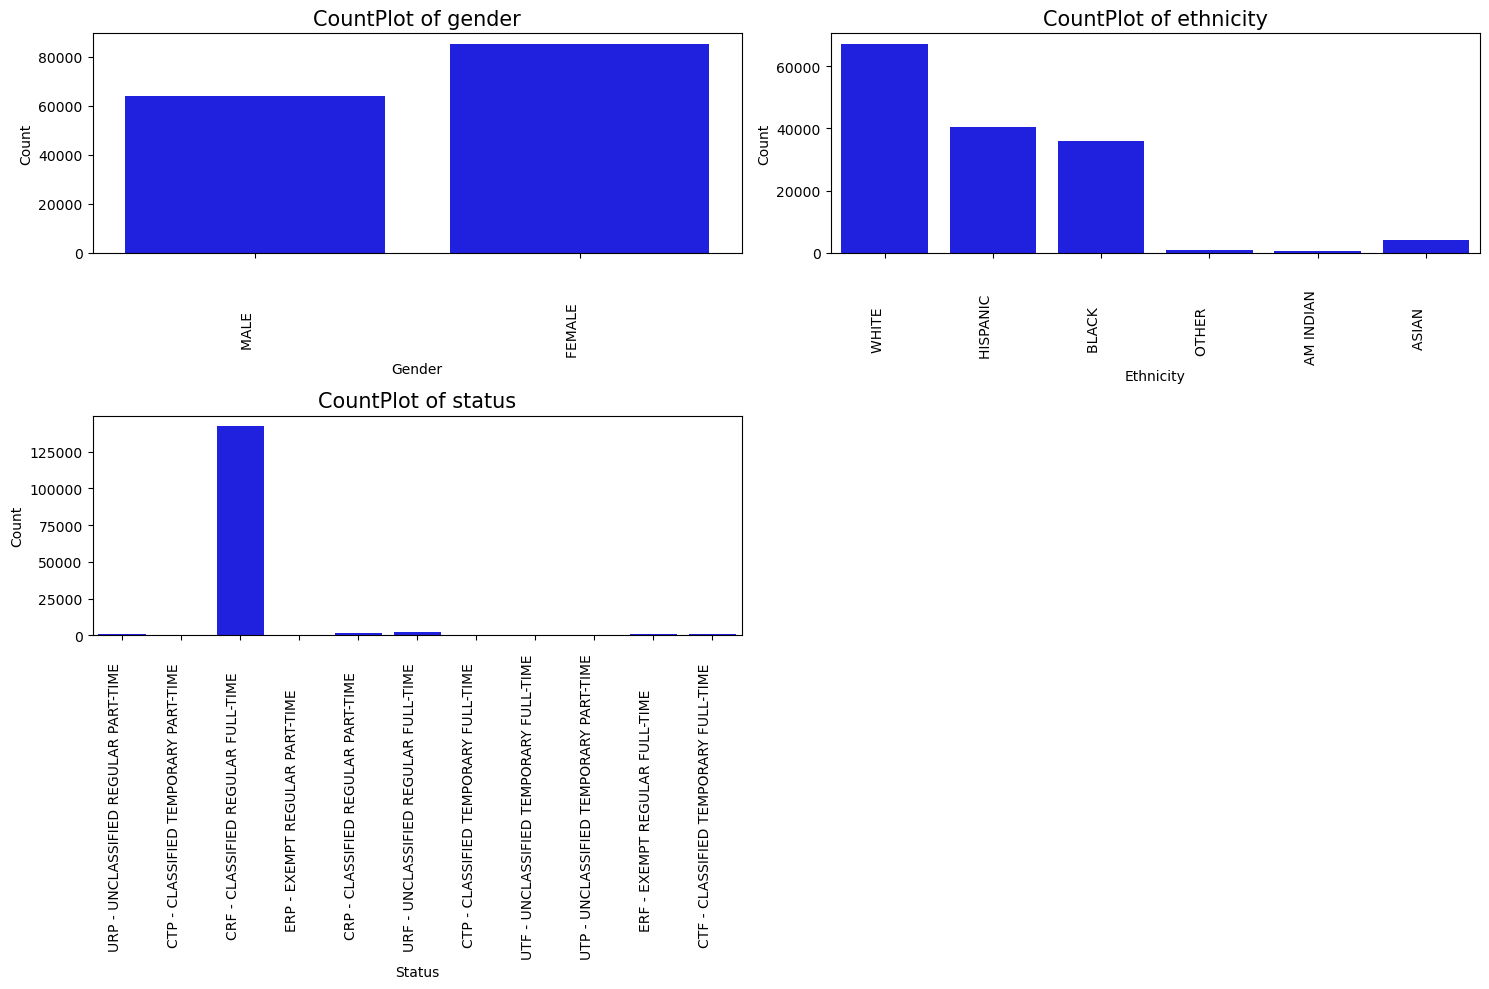

In [60]:
# Countplot for the 'gender' and ethnicity
features = ['gender', 'ethnicity', 'status']
data = data
plt.figure(figsize=(15,10))
i = 1
for feature in features:
    plt.subplot(2, 2, i)
    sns.countplot(x= feature , data=data, color='blue')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'CountPlot of {feature}', fontsize=15)
    plt.xlabel(feature.capitalize(), fontsize=10)
    plt.ylabel('Count', fontsize=10)
    i=i+1
plt.tight_layout()
plt.show()

### Interpretation:
#### 1) There are total 113 different Agencies are working for the Texas State government.
#### 2) There are total 1422 different posts on which the employees are working for Texas State government.
#### 3) The number of Female employees is greater than the Male employees which are working for Texas State government.
#### 4) The number of employees which are categorized to the White Ethnicity is most among all this is may be because Texas have more population of white residents.
#### 5) The employment status for maximum of the employees is CRF i.e Classified Regular Full Time, which means most of the employees are working full time and regular and the classified term means they have some rules and regulations to follow.

## ii) Bivariate Analysis

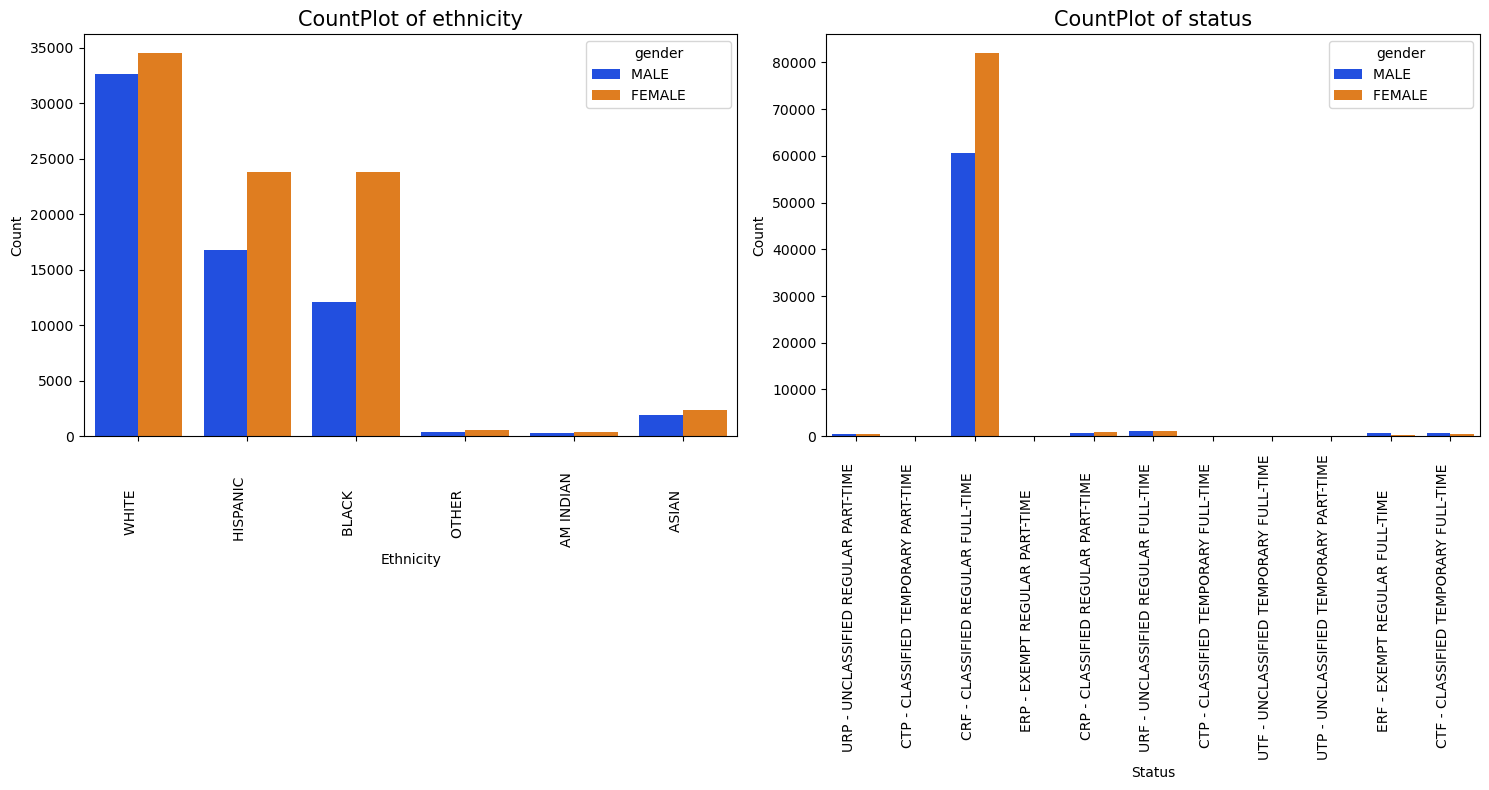

In [64]:
# Countplot for the 'status' and ethnicity based on 'gender'
features = ['ethnicity', 'status']
data = data
plt.figure(figsize=(15,8))
i = 1
for feature in features:
    plt.subplot(1, 2, i)
    sns.countplot(x= feature , data=data, hue= 'gender', palette= 'bright')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'CountPlot of {feature}', fontsize=15)
    plt.xlabel(feature.capitalize(), fontsize=10)
    plt.ylabel('Count', fontsize=10)
    i=i+1
plt.tight_layout()
plt.show()

In [66]:
# We have to convert the categorical data into numeric form by using label encoding for the necessary columns.
from sklearn.preprocessing import LabelEncoder
# Initializing the LabelEncoder
le = LabelEncoder()
# Columns to encode
columns_to_encode = ['class_code','ethnicity', 'gender', 'status','first_name', 'last_name', 'middle_initial']
# Applying label encoding
for col in columns_to_encode:
    data[col] = le.fit_transform(data[col])
data.head(2)

,agency,agency_name,last_name,first_name,middle_initial,class_code,class_title,ethnicity,gender,status,employ_date,hourly_rate,hours_per_week,monthly_income,annual_income,state_number
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",30461,15274,22,1409,"JUDGE, RETIRED ...",5,1,8,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,30461,15274,22,616,GENERAL COUNSEL IV ...,5,1,4,02/01/15,81.04454,4.0,1404.77,16857.24,127717


#### We didn't converted the 'agency_name' and 'class_title' into numeric because for each value in this columns there is an unique value in 'agency' and 'class_code' column so to avoid overlaping and extra time to train models we avoided those columns.

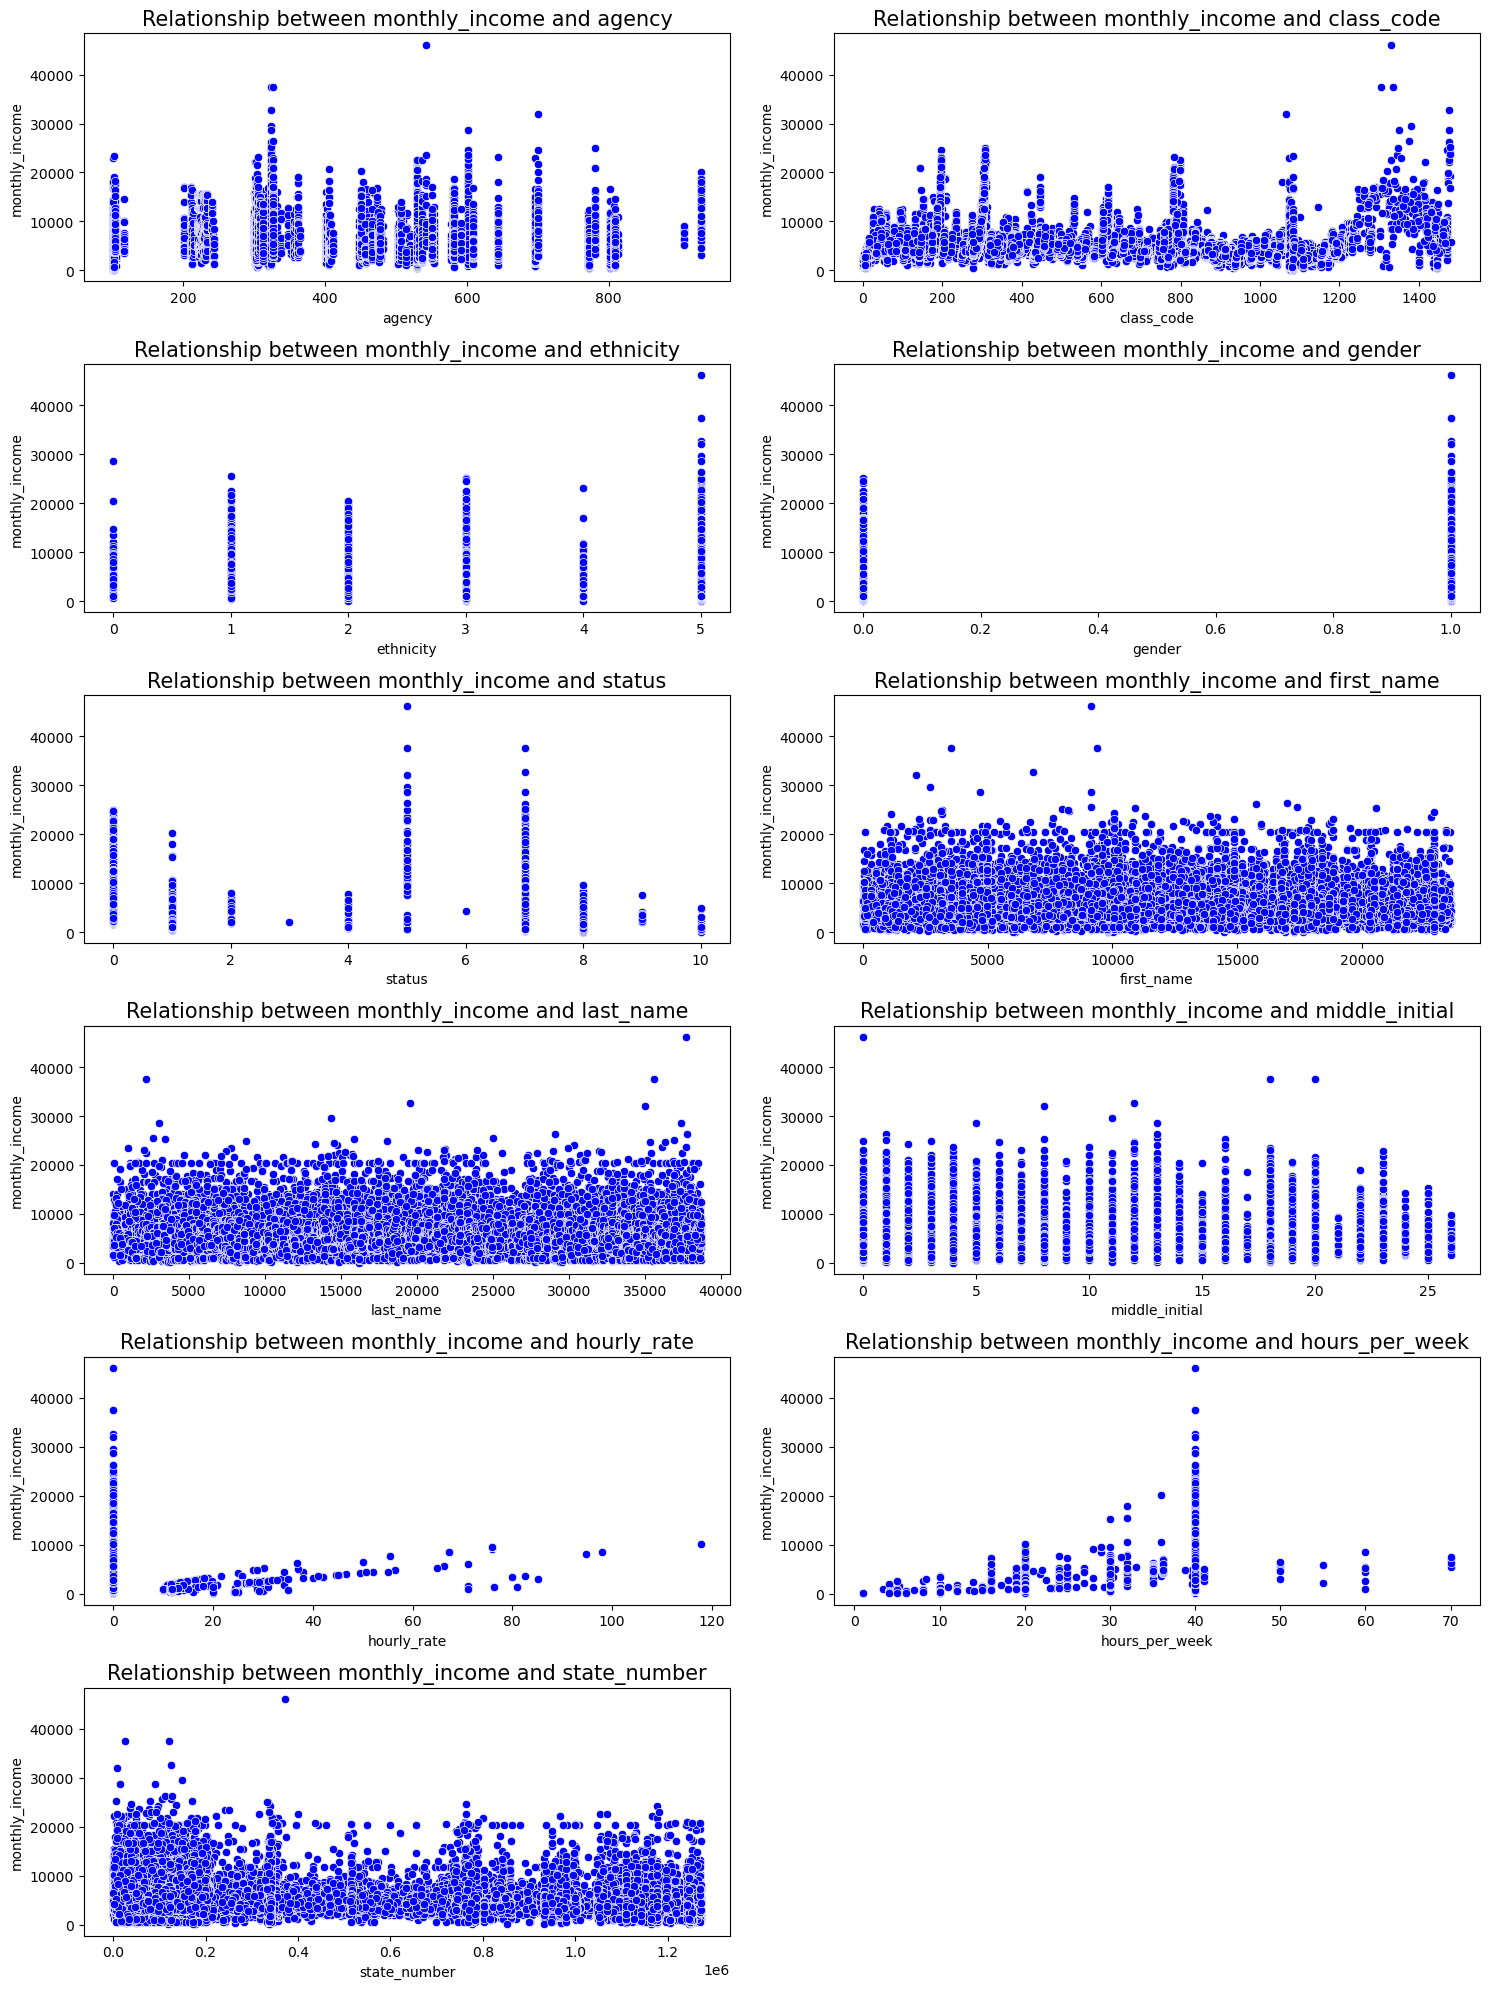

In [70]:
# checking for the relationship between dependent(monthly_income) and independent variables.
ind_var = ['agency', 'class_code', 'ethnicity', 'gender', 'status',
           'first_name', 'last_name', 'middle_initial', 
           'hourly_rate', 'hours_per_week','state_number']
data=data
plt.figure(figsize=(15,20))
i=1
for var in ind_var:
    plt.subplot(6, 2, i)
    sns.scatterplot(x=var, y='monthly_income', data=data, color='blue')
    plt.title(f'Relationship between monthly_income and {var}', fontsize=15)
    i=i+1
plt.tight_layout()
plt.show()

### Interpretation:
#### 1) As the overall number of Female employees is greater than the Male employees so the number of Female employees with every Ethnicity is greater than Male.
#### 2) The number of Female employees is greater with classified regular full time status, but for the class exempt regular full time and classified temporary full time the Mlae employees are more than Female.
#### 3) There is no perticular relationship between the dependent and independent variables. So we can't go for the linear regression which requires linear relationship between dependent and independent variables.
#### 4) As per the Ethnicity the White employees have more monthly income than the others around 40000 dollars and for some more than that.
#### 5) It is observed that certain Male employees have more monthly income than all Female employees.
#### 6) Generally the employees with high hourly rate have high monthly income but it is observed that the employees with low hourly rate have more monthly income than others, this is may be due to extra hours of working.
#### 7) It is observed that the employees having 40 working hours per week have the highest mothly income.


## iii) Multivariate Analysis

<Axes: >

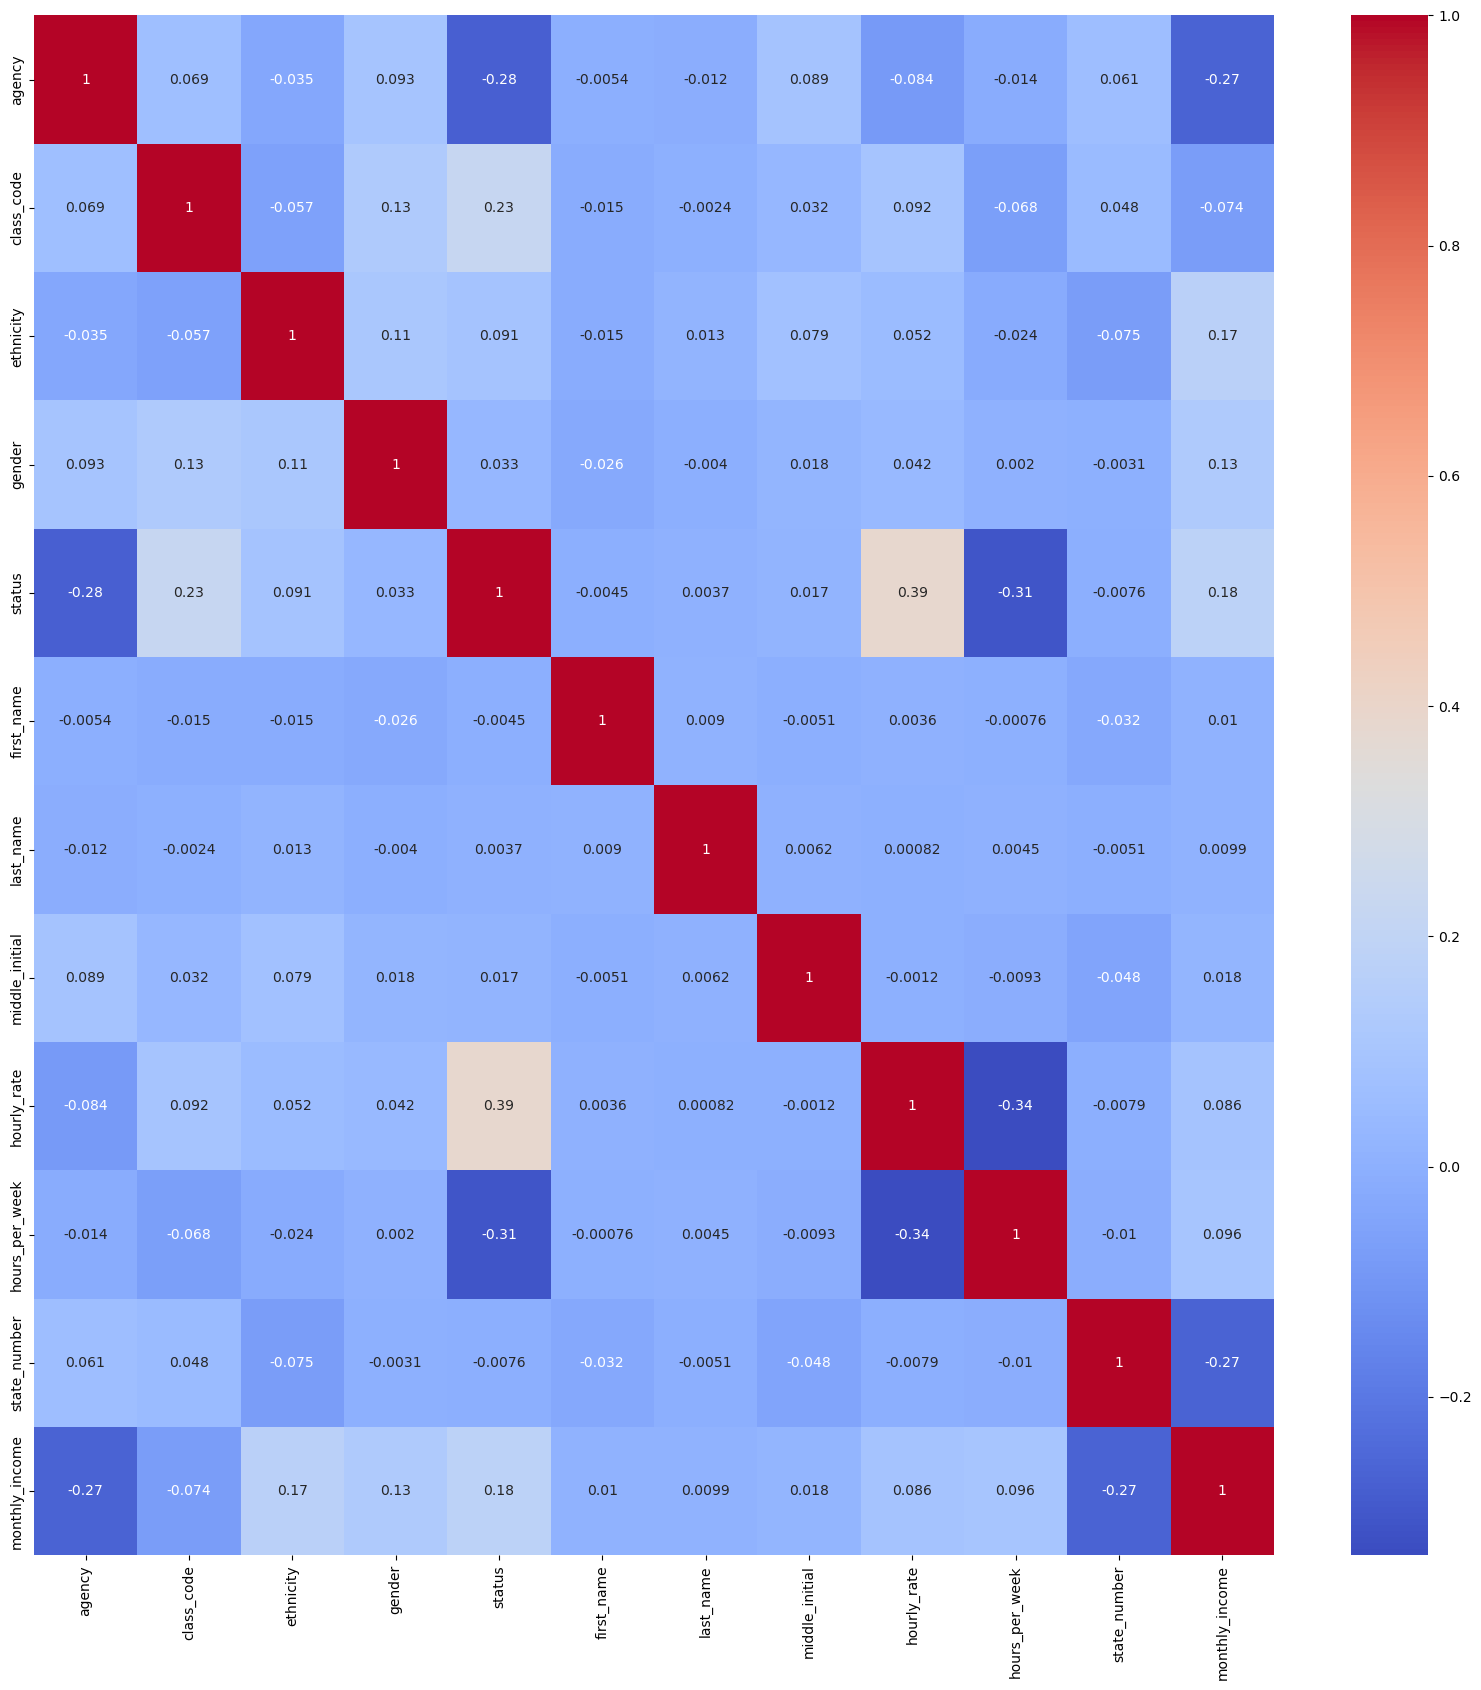

In [74]:
# Corr. Matrix
var = ['agency', 'class_code', 'ethnicity', 'gender', 'status',
           'first_name', 'last_name', 'middle_initial', 
           'hourly_rate', 'hours_per_week','state_number', 'monthly_income']
corr_matrix = data[var].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Interpretation:
#### There is no multicollinearirty in the selected features.

# 3) Data Preprocessing anf Feature Engineering

In [78]:
# Selecting the features for the model implementation
data_new = data[['agency', 'class_code', 'ethnicity', 'gender', 'status',
                 'first_name', 'last_name', 'middle_initial', 
                 'hourly_rate', 'hours_per_week', 'state_number', 'monthly_income']]

# Display the first few rows of the new DataFrame
data_new.head()

,agency,class_code,ethnicity,gender,status,first_name,last_name,middle_initial,hourly_rate,hours_per_week,state_number,monthly_income
0,241,1409,5,1,8,15274,30461,22,75.96150,29.0,127717,9545.82
1,212,616,5,1,4,15274,30461,22,81.04454,4.0,127717,1404.77
2,241,1409,5,1,8,10053,33197,10,75.96150,29.0,59115,9545.82
3,212,616,5,1,4,10053,33197,10,81.04453,4.0,59115,1404.77
4,696,810,3,0,0,6953,26462,0,0.00000,40.0,165030,3284.27
